In [45]:
# test file
import synapseclient
import pandas as pd
from genepy.utils import helper as ghelp

SYN_LOGIN = 'jkobject'
SYN_PASSWORD = "QXAxTW2s4AcRjaz"
syn = synapseclient.Synapse() 
syn.login(SYN_LOGIN,SYN_PASSWORD) 

# Obtain a pointer and download the data 
# loading the DREAM Challenge MM RNAseq dataset from Synapse
# dataset analysed with Salmon (reference-free mapper),
# using hg19 gene annotation annotated with ENTREZ id + ERCC (likely ERCC92) which is the spike-in gene which are not present here
syn9744875 = syn.get(entity='syn9744875')
syn9744732 = syn.get(entity='syn9744732')
syn9926878 = syn.get(entity='syn9926878')

rna_data = pd.read_csv(syn9744875.path, sep='\t', index_col=0)
clinical_data = pd.read_csv(syn9926878.path, sep=',').set_index('Patient')
explanation = pd.read_csv(syn9744732.path, sep=',', index_col=0)

Welcome, jkobject!



In [53]:
rna_data = pd.read_csv(syn9744875.path, sep='\t', index_col=0)

In [52]:
explanation.loc[set(clinical_data.columns) & set(explanation.index)]

,category,type,controlled_values,description,MMRF_IA8,GSE15695_UAMS,Hose,UAMS.UK.MyelomaXI,M2GEN,active
names,,,,,,,,,,
D_OS_FLAG,response,Numeric,"0=""No""; 1=""Yes""",Is the patient deceased?,STAND_ALONE_SURVIVAL.censos,NaN,OS_STATUS,OS_status,NaN,1.0
D_PFS,response,Numeric,NaN,Progression-free survival: number of days from...,STAND_ALONE_SURVIVAL.ttcpfs,NaN,as.integer(as.numeric(EFS) /12 * 365.25),PFS_months/12*365.25,NaN,1.0
D_Age,demographic,Numeric,NaN,Age at diagnosis (years),PER_PATIENT::D_PT_age,GSE15695_My9_GEP_clinical_data::age,age,Age,Demographics::AgeAtDiagnosis,1.0
D_Gender,demographic,Factor,Male; Female,Gender string,PER_PATIENT::DEMOG_GENDER,GSE15695_My9_GEP_clinical_data::sex,"recode(sex, ""male""=""Male"", ""female""=""Female"")","ifelse(grepl(""M"",toupper(df$Gender) ), ""Male"",...",Demographics::Gender,1.0
D_OS,response,Numeric,NaN,Overall Survival time: number of days from (tr...,STAND_ALONE_SURVIVAL.ttcos,NaN,as.numeric(OS) /12 * 365.25,OS_months/12*365.25,NaN,1.0
D_ISS,response,Factor,1; 2; 3,ISS Disease Stage,PER_PATIENT::D_PT_iss,GSE15695_My9_GEP_clinical_data::iss,ISS,"ISS column. `Stage I` = 1, `Stage II` = 2, `St...",NaN,1.0
Patient,id,Character,NaN,Normalized patient identification number.,MMRF_CoMMpass_IA8b_Seq_QC_Summary::Patients..K...,Array number,NaN,"format ""UAMS_0000""",Celgene Pt 1 = “1”,1.0
D_PFS_FLAG,response,Numeric,"0=""No""; 1=""Yes""",Has the patient developed progressive disease ...,STAND_ALONE_SURVIVAL.censpfs,NaN,EFS_STATUS,PFS_status,NaN,1.0


In [3]:
clinical_labels = {"D_OS": 'survival_days', "D_OS_FLAG": 'has_survived', "D_PFS": 'pfs_days', "D_PFS_FLAG": 'has_progressed', "HR_FLAG": 'to_pred'}
clinical_features = {'D_Age': 'age', 'D_Gender': 'sex', 'D_ISS': 'stage'}


In [4]:
clinical_data = clinical_data.rename(columns={**clinical_labels,**clinical_features})
# 
clinical_data = clinical_data[clinical_data.to_pred!='CENSORED']
# subsetting columns
clinical_data = clinical_data[list(clinical_features.values()) + list(clinical_labels.values())]

In [114]:
clinical_data

,age,sex,stage,survival_days,has_survived,pfs_days,has_progressed,to_pred
Patient,,,,,,,,
MMRF_1021,54,Female,1.0,1575,0,623,1,FALSE
MMRF_1029,46,Male,1.0,995,0,995,0,FALSE
MMRF_1030,65,Female,1.0,1572,0,1572,0,FALSE
MMRF_1031,62,Male,1.0,1581,0,1329,1,FALSE
MMRF_1032,76,Male,2.0,934,1,908,1,FALSE
...,...,...,...,...,...,...,...,...
MMRF_2535,46,Female,3.0,354,0,354,1,TRUE
MMRF_2554,65,Male,1.0,271,1,271,1,TRUE
MMRF_2557,83,Male,3.0,325,1,131,1,TRUE


In [158]:
gene_names = ghelp.generateGeneNames()

downloading gene names from biomart


In [7]:
gene_names = gene_names[gene_names.gene_biotype=='protein_coding'].set_index('ensembl_gene_id')

In [159]:
gene_names[gene_names.hgnc_symbol=="IKBKG"]

,ensembl_gene_id,clone_based_ensembl_gene,hgnc_symbol,gene_biotype,entrezgene_id
36069,ENSG00000269335,NaN,IKBKG,protein_coding,8517.0


In [57]:
rna_data = rna_data.loc[set(gene_names.index) & set(rna_data.index)]

In [66]:
rna_data.index = [gene_names.loc[val]['hgnc_symbol'] if type(gene_names.loc[val]['hgnc_symbol']) is str else gene_names.loc[val].iloc[0]['hgnc_symbol'] for val in rna_data.index]

In [95]:
len(set(rna_data.columns) - set(mmrf_clinical['RNA-Seq']))

81

In [67]:
# sorting to get the latest rnaseq available for a patient. By postulating that the number is equal to the timepoint at sampling 
col = list(rna_data.columns)
col.sort()
rna_data = rna_data[col]

In [68]:
rna_data.columns =  ['_'.join(i.split('_')[:2]) for i in rna_data.columns]

In [69]:
for val in ghelp.dups(rna_data.columns):
    loc = rna_data[val].iloc[:,-1]
    rna_data.drop(val, axis=1, inplace=True)
    rna_data[val] = loc.values

In [125]:
len(clinical_data[clinical_data['stage'].isna()])

15

In [14]:
clinical_data = clinical_data[~clinical_data['stage'].isna()]

In [15]:
to_add = clinical_data[clinical_features.values()].replace({'Female': 1, 'Male': 0}).astype(int)

In [72]:
X = rna_data.T.loc[list(set(clinical_data.index))]

In [74]:
X = pd.concat([X, to_add], axis=1)

In [18]:
Y = clinical_data.replace({'FALSE':0, 'TRUE': 1})['to_pred'].loc[X.index].values

In [217]:
on = ['age', 'stage', 'PHF19', 'BCL2A1']

In [86]:
X = X[~X.age.isna()]

- 0.55 RF without any preprocessing 
- 0.70 RF with preprocessing and feature selection (60 estimators)
- 0.71 SVM with preprocessing and feature selection <-- best model
- 0.70 KNN (15 neighboors)

In [383]:
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [ ]:

scaler = preprocessing.StandardScaler().fit(X[on].values)
X_scaled = scaler.transform(X[on].values)


clf = RandomForestClassifier(n_estimators=60)
clf = clf.fit(X.values, Y)
scores = cross_val_score(clf, X.values, Y, cv=10)
print(scores.mean())
clf = svm.SVC()
clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled, Y, cv=100)
print(scores.mean())
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled, Y, cv=100)
print(scores.mean())
#print(roc_auc_score)


In [324]:
pathways = {}
with open('../data/MMpathways.gmt') as f:
    for val in f.read().splitlines():
        pathways[val.split('\t')[0]] = val.split('\t')[2:]

In [325]:
xcol = set(X.columns)
for k, val in pathways.items():
    pathways[k] = set(val) & set(xcol)

In [ ]:
for k, val in pathways.items():
  print(k + '\t\t' + '\t'.join(val))

In [178]:
xcol = set(X.columns)
for k, val in pathways.items():
    X[k] = X[set(val) & xcol].sum(axis=1)

[WARNING] <ipython-input-178-7e784c4f374c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[k] = X[set(val) & xcol].sum(axis=1)



In [406]:
rna_data.var(1)

PRR20A        0.002969
TWSG1        19.913346
CTSZ       8127.158627
DAP         438.559090
FBXO17        1.060568
              ...     
LAMTOR5     314.245852
TAF4B        30.897992
TMEM71        6.570329
NCOA7        94.463696
HSBP1        84.054280
Length: 19205, dtype: float64

In [405]:
rna_data[rna_data.var(1)!=0]

,MMRF_1021,MMRF_1029,MMRF_1030,MMRF_1031,MMRF_1032,MMRF_1033,MMRF_1037,MMRF_1038,MMRF_1045,MMRF_1048,...,MMRF_2039,MMRF_1229,MMRF_1778,MMRF_2419,MMRF_1518,MMRF_1242,MMRF_1309,MMRF_1587,MMRF_2089,MMRF_1284
PRR20A,0.003496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001004,0.00000,0.000000,0.000000,0.000000,0.000000,0.537420,0.000000
TWSG1,8.710340,13.833500,11.625100,17.803900,14.306000,2.805780,6.105020,7.966150,2.534890,7.745060,...,2.666170,7.636830,5.060380,3.50387,10.327100,9.305590,3.138180,8.548180,2.752980,5.902170
CTSZ,114.813000,87.726500,98.401200,124.376000,114.800000,71.203800,105.645000,86.679900,43.363500,254.166000,...,66.604100,73.373200,104.911000,92.37380,33.193400,34.519000,87.932800,65.334100,53.350200,272.343000
DAP,27.807900,42.272400,30.955200,63.403700,55.063700,29.681000,37.366700,28.219900,31.852300,42.421900,...,37.478200,39.268100,43.820700,51.28680,178.879000,59.522100,43.837900,58.539800,95.487300,33.553400
FBXO17,0.887648,0.000000,0.000000,0.007776,0.000000,0.664490,0.029086,0.000000,0.000000,0.304403,...,0.053398,0.000000,0.011038,0.00692,0.020416,0.012234,0.021565,0.045469,0.000000,0.142358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAMTOR5,21.369300,33.913000,21.715700,32.832500,39.960100,12.710400,15.357400,18.842900,29.412000,52.284200,...,102.834000,31.178200,36.783300,28.55250,116.315000,103.653000,29.280100,63.515300,39.761900,37.363900
TAF4B,2.121040,5.624080,4.738660,4.221980,6.308060,2.426440,3.676090,4.573890,2.706180,4.705140,...,8.688400,3.126980,1.936900,13.54450,14.304700,14.490900,2.273250,17.521900,10.796400,5.274280
TMEM71,0.081443,0.009403,0.060323,0.073700,0.155082,0.350505,0.026476,0.065309,0.029972,0.042702,...,14.752300,0.372537,1.993330,0.12047,0.155042,0.430852,0.104637,0.334475,0.032953,2.903960
NCOA7,12.205900,6.704110,17.569800,5.404000,24.759000,8.805900,7.195110,7.010970,6.108030,5.586340,...,4.079070,5.218330,3.096100,8.42927,6.963350,7.180880,2.349870,9.165860,3.022900,16.645600


In [177]:
X = X.iloc[:,(X.var(0)!=0).values]

In [182]:
list(pathways.keys())

['BIOCARTA_DEATH_PATHWAY',
 'BIOCARTA_CELLCYCLE_PATHWAY',
 'BIOCARTA_ERK_PATHWAY',
 'BIOCARTA_NFKB_PATHWAY',
 'BIOCARTA_P53_PATHWAY',
 'BIOCARTA_RAS_PATHWAY',
 'BORTEZOMIB_ABNORMALITY_OF_CHROMOSOME_STABILITY',
 'REACTOME_ANTIGEN_PROCESSING_UBIQUITINATION_PROTEASOME_DEGRADATION',
 'REACTOME_DNA_REPAIR',
 'UAMS17',
 'THALIDOMIDE']

In [219]:
n_on = on + list(pathways.keys())

In [238]:
np.array(n_on)[abs(coef)>0.2]

array(['age', 'stage', 'PHF19', 'BIOCARTA_P53_PATHWAY',
       'BIOCARTA_RAS_PATHWAY',
       'REACTOME_ANTIGEN_PROCESSING_UBIQUITINATION_PROTEASOME_DEGRADATION',
       'REACTOME_DNA_REPAIR', 'UAMS17'], dtype='<U65')

In [343]:
coef = clf.coef_[0]

In [346]:
scaler = preprocessing.StandardScaler().fit(X[n_on].values)
X_scaled = scaler.transform(X[n_on].values)

clf = svm.SVC()
#clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled, Y, cv=100)
print(scores.mean())

clf = LogisticRegression()
clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled[:, abs(clf.coef_[0])>0.2], Y, cv=100)
print(scores.mean())

clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=1, max_iter=800)
clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled, Y, cv=100)
print(scores.mean())

## F1 score
## ROC curve

0.7025
0.7200000000000002
0.7125000000000001


In [400]:
Y_pred = clf.predict(X_scaled)

In [401]:
pip install scikit-survival

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

In [ ]:
kaplan_meier_estimator

In [ ]:
for pred_event in (1, 0):
    mask_treat = Y_pred == pred_event
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        clinical_data["D_OS_FLAG"][mask_treat],
        clinical_data["D_OS"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="EVENT_PREDICTION = %s" % pred_event)

  plt.ylabel("est. probability of survival $\hat{S}(t)$")
  plt.xlabel("time $t$")
  plt.legend(loc="best")

In [376]:
def show_metrics(clf, X_scaled, Y):
  Y_pred = clf.predict(X_scaled)
  prec, rec, f1, _ = precision_recall_fscore_support(Y, Y_pred, average='weighted')
  plot_roc_curve(clf, X_scaled, Y)
  plt.show()
  cross_scores = cross_val_score(clf, X_scaled, Y, cv=100)
  for pred_event in (1, 0):
    mask_treat = Y_pred == pred_event
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        clinical_data["D_OS_FLAG"][mask_treat],
        clinical_data["D_OS"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="EVENT_PREDICTION = %s" % pred_event)

  plt.ylabel("est. probability of survival $\hat{S}(t)$")
  plt.xlabel("time $t$")
  plt.legend(loc="best")
  print('precision, recall, f1_score:')
  print(prec, rec, f1 )
  print('k-fold CV score:')
  print(cross_scores.mean())

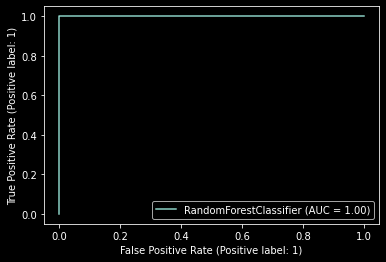

precision, recall, f1_score:
1.0 1.0 1.0
k-fold CV score:
0.6850000000000002


In [394]:
clf = RandomForestClassifier(n_estimators=40)
clf = clf.fit(X.values, Y)
show_metrics(clf, X.values, Y)

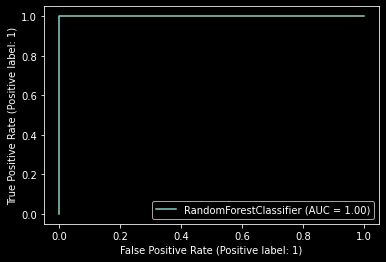

precision, recall, f1_score:
1.0 1.0 1.0
k-fold CV score:
0.6608333333333334


In [393]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

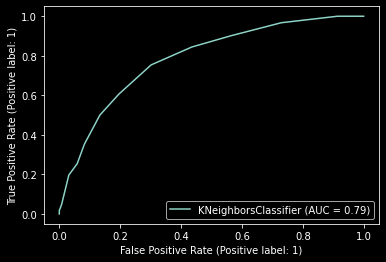

precision, recall, f1_score:
0.7230974207845697 0.7347480106100795 0.7069343128736194
k-fold CV score:
0.7016666666666667


In [389]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

In [ ]:
clf = svm.SVC(C=0.9)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

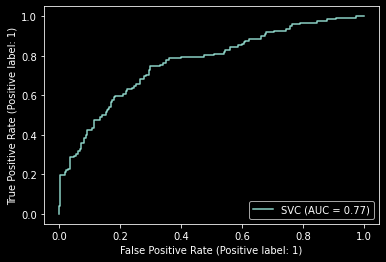

precision, recall, f1_score:
0.7268692474138817 0.7347480106100795 0.7007688085516447
k-fold CV score:
0.7100000000000002


In [395]:
clf = svm.SVC(C=0.9)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

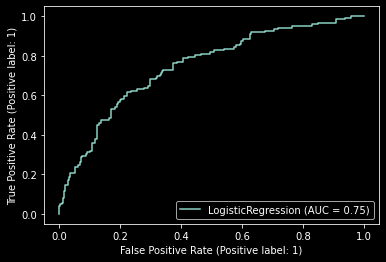

precision, recall, f1_score:
0.7021325124473028 0.7161803713527851 0.6733681420528662
k-fold CV score:
0.7150000000000002


In [377]:
clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=1, max_iter=800, C=0.2)
clf = clf.fit(X_scaled, Y)
show_metrics(clf, X_scaled, Y)

In [320]:
clf = RandomForestClassifier(n_estimators=40)
clf = clf.fit(X_scaled, Y)
scores = cross_val_score(clf, X_scaled, Y, cv=10)
print(scores.mean())

clf = DecisionTreeClassifier()
clf = clf.fit(X_scaled, Y)

scores = cross_val_score(clf, X_scaled, Y, cv=10)
print(scores.mean())

0.6899004267425319
0.5491465149359886


In [ ]:
ran

In [ ]:
get_params

In [149]:
from importlib import reload
rna = reload(rna)

In [146]:
from genepy import rna

%reload_ext autoreload
%autoreload 2 

In [332]:
X[gsea.index] = gsea.T.loc[X.index]

[WARNING] /Users/jeremie/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]



In [334]:
X[X.columns[-20:]]

,UBE2E2,LAMTOR5,TAF4B,TMEM71,NCOA7,HSBP1,age,sex,stage,BIOCARTA_DEATH_PATHWAY,BIOCARTA_CELLCYCLE_PATHWAY,BIOCARTA_ERK_PATHWAY,BIOCARTA_NFKB_PATHWAY,BIOCARTA_P53_PATHWAY,BIOCARTA_RAS_PATHWAY,BORTEZOMIB_ABNORMALITY_OF_CHROMOSOME_STABILITY,REACTOME_ANTIGEN_PROCESSING_UBIQUITINATION_PROTEASOME_DEGRADATION,REACTOME_DNA_REPAIR,UAMS17,THALIDOMIDE
MMRF_1889,4.37895,57.7361,6.27239,0.121006,16.46210,18.50180,62.0,1.0,3.0,0.310103,0.354064,0.308494,0.195685,0.432356,0.393406,0.301803,0.330683,0.395166,0.460024,-0.217642
MMRF_1383,7.80850,26.4266,5.65751,0.033997,13.27650,3.99897,73.0,0.0,1.0,0.360504,0.232801,0.331542,0.256218,0.352677,0.412726,0.170903,0.336702,0.336859,0.323534,-0.360505
MMRF_1164,22.54530,67.5897,5.72740,2.582780,7.01156,14.88220,70.0,1.0,3.0,0.358628,0.251418,0.329156,0.322770,0.368675,0.431262,0.166462,0.325997,0.312260,0.319430,-0.409392
MMRF_1846,7.31119,31.4234,6.33410,0.028593,2.79843,6.05114,58.0,0.0,1.0,0.389509,0.222910,0.358513,0.323775,0.388649,0.415364,0.166240,0.325691,0.330902,0.295239,-0.277175
MMRF_2119,9.45772,44.1179,4.64468,0.266574,10.46050,10.87880,60.0,1.0,3.0,0.362340,0.331262,0.309469,0.249849,0.364313,0.394249,0.220010,0.335049,0.348689,0.353614,-0.336137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_1408,16.37050,40.1954,7.23519,0.140981,21.43560,12.53840,62.0,1.0,1.0,0.357035,0.222898,0.336339,0.263248,0.431429,0.408557,0.185449,0.336493,0.344826,0.248054,-0.362613
MMRF_2562,21.45910,59.0201,22.89330,0.045621,9.18464,16.43650,66.0,0.0,2.0,0.395897,0.268533,0.342420,0.268853,0.419649,0.431302,0.204652,0.338550,0.343921,0.338640,-0.324612
MMRF_1654,9.05918,49.8076,7.58806,3.458290,14.40630,23.64220,86.0,0.0,2.0,0.341955,0.313834,0.322646,0.283161,0.367308,0.379171,0.191129,0.332932,0.343712,0.312036,-0.357570
MMRF_1393,6.07203,24.2424,6.67436,0.200702,20.98150,3.20694,58.0,1.0,2.0,0.363227,0.290747,0.349512,0.331546,0.434073,0.477134,0.169364,0.326758,0.314857,0.232872,-0.367307


In [330]:
gsea

,MMRF_1021,MMRF_1029,MMRF_1030,MMRF_1031,MMRF_1032,MMRF_1033,MMRF_1037,MMRF_1038,MMRF_1045,MMRF_1048,...,MMRF_2039,MMRF_1229,MMRF_1778,MMRF_2419,MMRF_1518,MMRF_1242,MMRF_1309,MMRF_1587,MMRF_2089,MMRF_1284
BIOCARTA_DEATH_PATHWAY,0.334025,0.385600,0.373136,0.355098,0.372045,0.358233,0.366674,0.396631,0.352911,0.373366,...,0.333351,0.372462,0.376526,0.345168,0.373808,0.379148,0.374008,0.380769,0.319101,0.377560
BIOCARTA_CELLCYCLE_PATHWAY,0.263254,0.255618,0.256062,0.358889,0.276184,0.215206,0.242182,0.228073,0.226473,0.283246,...,0.356947,0.220272,0.284410,0.248551,0.381929,0.360873,0.291652,0.385860,0.357974,0.245349
BIOCARTA_ERK_PATHWAY,0.353344,0.334111,0.337636,0.336148,0.313722,0.328460,0.353370,0.338778,0.333813,0.352967,...,0.362993,0.319443,0.382018,0.312526,0.360071,0.361226,0.357055,0.347817,0.354843,0.339479
BIOCARTA_NFKB_PATHWAY,0.267654,0.268335,0.263450,0.231004,0.259294,0.268432,0.268004,0.260051,0.252540,0.257722,...,0.273722,0.257537,0.271704,0.232746,0.289841,0.261659,0.264177,0.263605,0.185550,0.342763
BIOCARTA_P53_PATHWAY,0.398249,0.436573,0.456137,0.453244,0.453924,0.436039,0.458544,0.417711,0.419977,0.397572,...,0.431002,0.399825,0.420606,0.407893,0.393723,0.378128,0.432209,0.480828,0.343003,0.444086
BIOCARTA_RAS_PATHWAY,0.421278,0.426604,0.416789,0.415184,0.409306,0.396516,0.424999,0.422295,0.399303,0.427259,...,0.444890,0.397018,0.424603,0.387949,0.427585,0.453812,0.411126,0.393247,0.425648,0.422719
BORTEZOMIB_ABNORMALITY_OF_CHROMOSOME_STABILITY,0.183811,0.175504,0.186027,0.252148,0.186838,0.199183,0.203157,0.190971,0.160837,0.202405,...,0.243144,0.180659,0.278469,0.178063,0.313851,0.220343,0.166196,0.288489,0.301758,0.160200
REACTOME_ANTIGEN_PROCESSING_UBIQUITINATION_PROTEASOME_DEGRADATION,0.325229,0.326934,0.328930,0.336716,0.326241,0.330853,0.326273,0.339992,0.327952,0.335397,...,0.331001,0.338118,0.325468,0.333455,0.332022,0.342513,0.324886,0.352271,0.322473,0.313924
REACTOME_DNA_REPAIR,0.337922,0.321687,0.332686,0.365583,0.328461,0.337022,0.339835,0.328767,0.342589,0.345063,...,0.355734,0.338477,0.374544,0.340791,0.395514,0.357407,0.317505,0.411027,0.408543,0.310138
UAMS17,0.320217,0.338686,0.308884,0.367831,0.331009,0.291236,0.325201,0.316089,0.294355,0.265919,...,0.342150,0.312177,0.381194,0.289920,0.414753,0.393306,0.301332,0.421296,0.405731,0.305100


In [329]:
gsea = await rna.gsva(rna_data.T, geneset_file="../data/MMpathways.gmt", method='ssgsea')

you need to have R installed with GSVA and GSEABase library installed
CompletedProcess(args='Rscript /Users/jeremie/Documents/Projects/BroadInstitute/genepy/genepy/rna/ssGSEA.R /tmp/data_genepyhelper_gsva.csv ../data/MMpathways.gmt ssgsea', returncode=0, stdout=b'Estimating ssGSEA scores for 11 gene sets.\n[1] "Calculating ranks..."\n[1] "Calculating absolute values from ranks..."\n\r  |                                                                            \r  |                                                                      |   0%\r  |                                                                            \r  |                                                                      |   1%\r  |                                                                            \r  |=                                                                     |   1%\r  |                                                                            \r  |=                                          